<a href="https://colab.research.google.com/github/QuanRy/Machine_Learning/blob/main/lab_8/lab_8_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import matplotlib as mpl
import pandas as pd
import numpy as np
import sklearn
import time
import sys
import os

In [2]:
#загружаем данные
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape)   # (20640, 8)
print(housing.target.shape) # (20640, )

(20640, 8)
(20640,)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 1.1251 - val_loss: 1.5281
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5072 - val_loss: 0.4590
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4247 - val_loss: 0.4214
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4083 - val_loss: 0

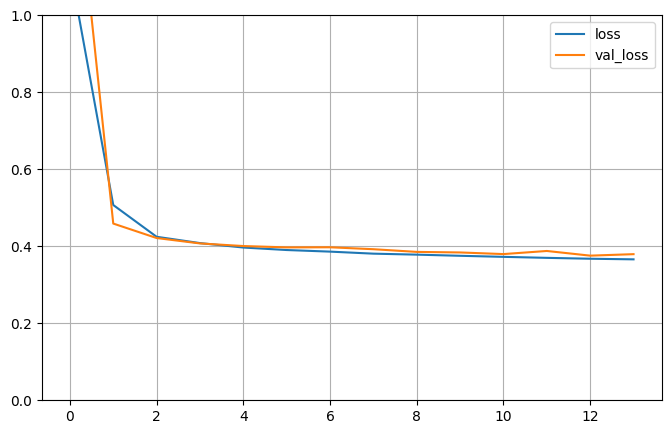

162/162 [==============================] - 0s 1ms/step - loss: 0.3818


0.3818024694919586

In [3]:

#Разделение набора данных
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape) # (11610, 8) (11610,)
print(x_valid.shape, y_valid.shape) # (3870, 8) (3870,)
print(x_test.shape, y_test.shape)   # (5160, 8) (5160,)

#Нормализация данных x = (x-u) / d
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

#Моделирование
model = keras.models.Sequential([keras.layers.Dense(30, activation='relu',input_shape=x_train.shape[1:]),
                                 keras.layers.Dense(1),
                                 ])
model.summary()
model.compile(loss="mean_squared_error",
              optimizer="sgd"
              )
#Изменение потери 5 последовательных эпох меньше, чем 1e-2
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
#По умолчанию частота не задана, каждую эпоху нужно проверять один раз
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks
                    )

#Отрисовка кривой обучения
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

#Тестирование модели
model.evaluate(x_test_scaled, y_test)